# Partial Least Squares

In [ ]:
# !pip install fsspec
# !pip install s3fs
# !pip install boto

import pandas as pd
import boto

# import the csv file directly from an s3 bucket
data = pd.read_csv('s3://articledatas3/meats.csv')
data = data.drop('Unnamed: 0', axis = 1)
data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 18.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2023.6.0
    Uninstalling fsspec-2023.6.0:
      Successfully uninstalled fsspec-2023.6.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2023.6.0 requires fsspec==2023.6.0, but you have fsspec 2023.12.2 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 13.5 MB/s eta 0:00:00


,x_001,x_002,x_003,x_004,x_005,x_006,x_007,x_008,x_009,x_010,...,x_094,x_095,x_096,x_097,x_098,x_099,x_100,water,fat,protein
0,2.61776,2.61814,2.61859,2.61912,2.61981,2.62071,2.62186,2.62334,2.62511,2.62722,...,2.94013,2.91978,2.89966,2.87964,2.85960,2.83940,2.81920,60.5,22.5,16.7
1,2.83454,2.83871,2.84283,2.84705,2.85138,2.85587,2.86060,2.86566,2.87093,2.87661,...,3.26655,3.25369,3.24045,3.22659,3.21181,3.19600,3.17942,46.0,40.1,13.5
2,2.58284,2.58458,2.58629,2.58808,2.58996,2.59192,2.59401,2.59627,2.59873,2.60131,...,2.65112,2.63262,2.61461,2.59718,2.58034,2.56404,2.54816,71.0,8.4,20.5
3,2.82286,2.82460,2.82630,2.82814,2.83001,2.83192,2.83392,2.83606,2.83842,2.84097,...,2.92576,2.90251,2.87988,2.85794,2.83672,2.81617,2.79622,72.8,5.9,20.7
4,2.78813,2.78989,2.79167,2.79350,2.79538,2.79746,2.79984,2.80254,2.80553,2.80890,...,3.25831,3.23784,3.21765,3.19766,3.17770,3.15770,3.13753,58.3,25.5,15.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,3.14626,3.15166,3.15703,3.16244,3.16791,3.17348,3.17923,3.18521,3.19140,3.19792,...,3.57915,3.56142,3.54365,3.52563,3.50705,3.48765,3.46769,53.4,31.3,15.3
211,2.57992,2.58040,2.58099,2.58175,2.58266,2.58381,2.58530,2.58719,2.58949,2.59225,...,2.92062,2.90367,2.88668,2.86951,2.85180,2.83347,2.81473,51.6,33.8,13.8
212,2.56875,2.56923,2.56985,2.57060,2.57150,2.57268,2.57420,2.57610,2.57841,2.58129,...,2.91592,2.89952,2.88291,2.86595,2.84836,2.82998,2.81111,50.3,35.5,13.2
213,2.65884,2.65943,2.66023,2.66108,2.66215,2.66360,2.66550,2.66787,2.67070,2.67405,...,3.01851,3.00327,2.98759,2.97121,2.95374,2.93514,2.91564,44.9,42.5,12.0


In [ ]:
# Split data in train, val, test
meats_train = data.iloc[0:130,:]
meats_val = data.iloc[130:175,:]
meats_test = data.iloc[175:215,:]

# Split the columns in X and Y
X_colnames = data.columns[:-3]
Y_colnames = data.columns[-3:]

# Split each train, val and test into two arrays
X_train = meats_train[X_colnames].values
Y_train = meats_train[Y_colnames].values

X_val = meats_val[X_colnames].values
Y_val = meats_val[Y_colnames].values

X_test = meats_test[X_colnames].values
Y_test = meats_test[Y_colnames].values

In [ ]:
from sklearn.cross_decomposition import PLSRegression
my_plsr = PLSRegression(n_components=100, scale=True)
my_plsr.fit(X_train, Y_train)

PLSRegression(n_components=100)

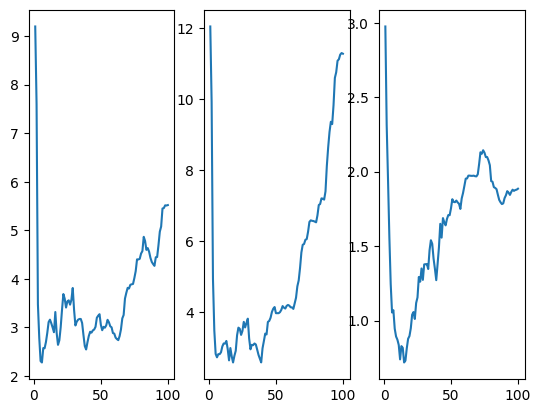

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Compute the validation error for each n_comp
water_plot = []
fat_plot = []
protein_plot = []

for n_comp in range(1, 101):
  my_plsr = PLSRegression(n_components=n_comp, scale=True)
  my_plsr.fit(X_train, Y_train)
  preds = my_plsr.predict(X_val)

  water_rmse = sqrt(mean_squared_error(Y_val[:,0] ,preds[:,0]))
  fat_rmse = sqrt(mean_squared_error(Y_val[:,1] ,preds[:,1]))
  protein_rmse = sqrt(mean_squared_error(Y_val[:,2] ,preds[:,2]))

  water_plot.append( water_rmse)
  fat_plot.append( fat_rmse)
  protein_plot.append(protein_rmse)

# Create the three plots using matplotlib
fig, axs = plt.subplots(1,3)

axs[0].plot(range(1, 101), water_plot)
axs[1].plot(range(1, 101), fat_plot)
axs[2].plot(range(1, 101), protein_plot)

fig.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will

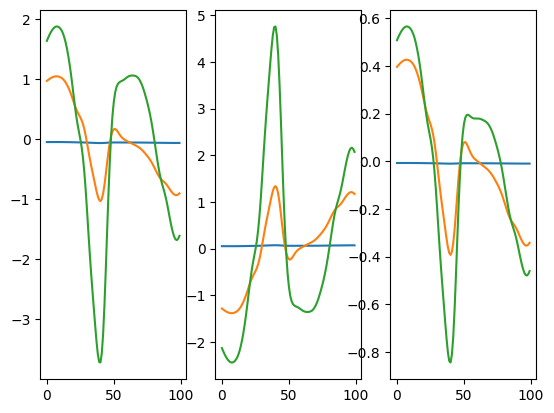

In [ ]:
# Coefficients Plot

# fit and extract coefs for 1 comp
my_plsr = PLSRegression(n_components=1, scale=True)
my_plsr.fit(X_train, Y_train)

water_1comp = my_plsr.coef_[:,0]
fat_1comp = my_plsr.coef_[:,1]
protein_1comp = my_plsr.coef_[:,2]


# fit and extract coefs for 2 comps
my_plsr = PLSRegression(n_components=2, scale=True)
my_plsr.fit(X_train, Y_train)

water_2comp = my_plsr.coef_[:,0]
fat_2comp = my_plsr.coef_[:,1]
protein_2comp = my_plsr.coef_[:,2]


# fit and extract coefs for 3 comps
my_plsr = PLSRegression(n_components=3, scale=True)
my_plsr.fit(X_train, Y_train)

water_3comp = my_plsr.coef_[:,0]
fat_3comp = my_plsr.coef_[:,1]
protein_3comp = my_plsr.coef_[:,2]


# Plot in a graph for each y variable
fig, axs = plt.subplots(1, 3)

# water comps
axs[0].plot(water_1comp)
axs[0].plot(water_2comp)
axs[0].plot(water_3comp)

# fat comps
axs[1].plot(fat_1comp)
axs[1].plot(fat_2comp)
axs[1].plot(fat_3comp)

# protein comps
axs[2].plot(protein_1comp)
axs[2].plot(protein_2comp)
axs[2].plot(protein_3comp)

In [ ]:
from sklearn.metrics import r2_score

best_r2 = 0
best_ncmop = 0
for n_comp in range(1, 101):
  my_plsr = PLSRegression(n_components=n_comp, scale=True)
  my_plsr.fit(X_train, Y_train)
  preds = my_plsr.predict(X_val)

  r2 = r2_score(preds, Y_val)
  if r2 > best_r2:
    best_r2 = r2
    best_ncomp = n_comp

print(best_r2, best_ncomp)

0.943195235309477 15


In [ ]:
best_model = PLSRegression(n_components=best_ncomp, scale=True)
best_model.fit(X_train, Y_train)
test_preds = best_model.predict(X_test)
print(r2_score(Y_test, test_preds))

0.9562812186453175


In [ ]:
!pip install fsspec
!pip install s3fs
!pip install boto

import pandas as pd
import boto

# import the csv file directly from an s3 bucket
data = pd.read_csv('s3://articledatas3/olive_oil.csv')
data = data.drop('Unnamed: 0', axis = 1)
data

,Acidity,Peroxide,K232,K270,DK,yellow,green,brown,glossy,transp,syrup,countries
0,0.73,12.70,1.900,0.1390,0.003,21.4,73.4,10.1,79.7,75.2,50.3,Greece
1,0.19,12.30,1.678,0.1160,-0.004,23.4,66.3,9.8,77.8,68.7,51.7,Greece
2,0.26,10.30,1.629,0.1160,-0.005,32.7,53.5,8.7,82.3,83.2,45.4,Greece
3,0.67,13.70,1.701,0.1680,-0.002,30.2,58.3,12.2,81.1,77.1,47.8,Greece
4,0.52,11.20,1.539,0.1190,-0.001,51.8,32.5,8.0,72.4,65.3,46.5,Greece
5,0.26,18.70,2.117,0.1420,0.001,40.7,42.9,20.1,67.7,63.5,52.2,Italy
6,0.24,15.30,1.891,0.1160,0.000,53.8,30.4,11.5,77.8,77.3,45.2,Italy
7,0.30,18.50,1.908,0.1250,0.001,26.4,66.5,14.2,78.7,74.6,51.8,Italy
8,0.35,15.60,1.824,0.1040,0.000,65.7,12.1,10.3,81.6,79.6,48.3,Italy
9,0.19,19.40,2.222,0.1580,-0.003,45.0,31.9,28.4,75.7,72.9,52.8,Italy


In [ ]:
# get dummies will dummy code your categorical variables (also called one-hot encoding)
dummified_data = pd.get_dummies(data)
dummified_data

,Acidity,Peroxide,K232,K270,DK,yellow,green,brown,glossy,transp,syrup,countries_Greece,countries_Italy,countries_Spain
0,0.73,12.70,1.900,0.1390,0.003,21.4,73.4,10.1,79.7,75.2,50.3,1,0,0
1,0.19,12.30,1.678,0.1160,-0.004,23.4,66.3,9.8,77.8,68.7,51.7,1,0,0
2,0.26,10.30,1.629,0.1160,-0.005,32.7,53.5,8.7,82.3,83.2,45.4,1,0,0
3,0.67,13.70,1.701,0.1680,-0.002,30.2,58.3,12.2,81.1,77.1,47.8,1,0,0
4,0.52,11.20,1.539,0.1190,-0.001,51.8,32.5,8.0,72.4,65.3,46.5,1,0,0
5,0.26,18.70,2.117,0.1420,0.001,40.7,42.9,20.1,67.7,63.5,52.2,0,1,0
6,0.24,15.30,1.891,0.1160,0.000,53.8,30.4,11.5,77.8,77.3,45.2,0,1,0
7,0.30,18.50,1.908,0.1250,0.001,26.4,66.5,14.2,78.7,74.6,51.8,0,1,0
8,0.35,15.60,1.824,0.1040,0.000,65.7,12.1,10.3,81.6,79.6,48.3,0,1,0
9,0.19,19.40,2.222,0.1580,-0.003,45.0,31.9,28.4,75.7,72.9,52.8,0,1,0


In [ ]:
# Split the dummified data into X and Y
Y = dummified_data[['countries_Greece', 'countries_Italy', 'countries_Spain']]
X = dummified_data[['Acidity', 'Peroxide', 'K232', 'K270', 'DK', 'yellow', 'green', 'brown', 'glossy', 'transp', 'syrup']]

In [ ]:
# import PLSRegression from scikitlearn
from sklearn.cross_decomposition import PLSRegression

# fit the pls regression
my_plsr = PLSRegression(n_components=2, scale=False)
my_plsr.fit(X, Y)

PLSRegression(scale=False)

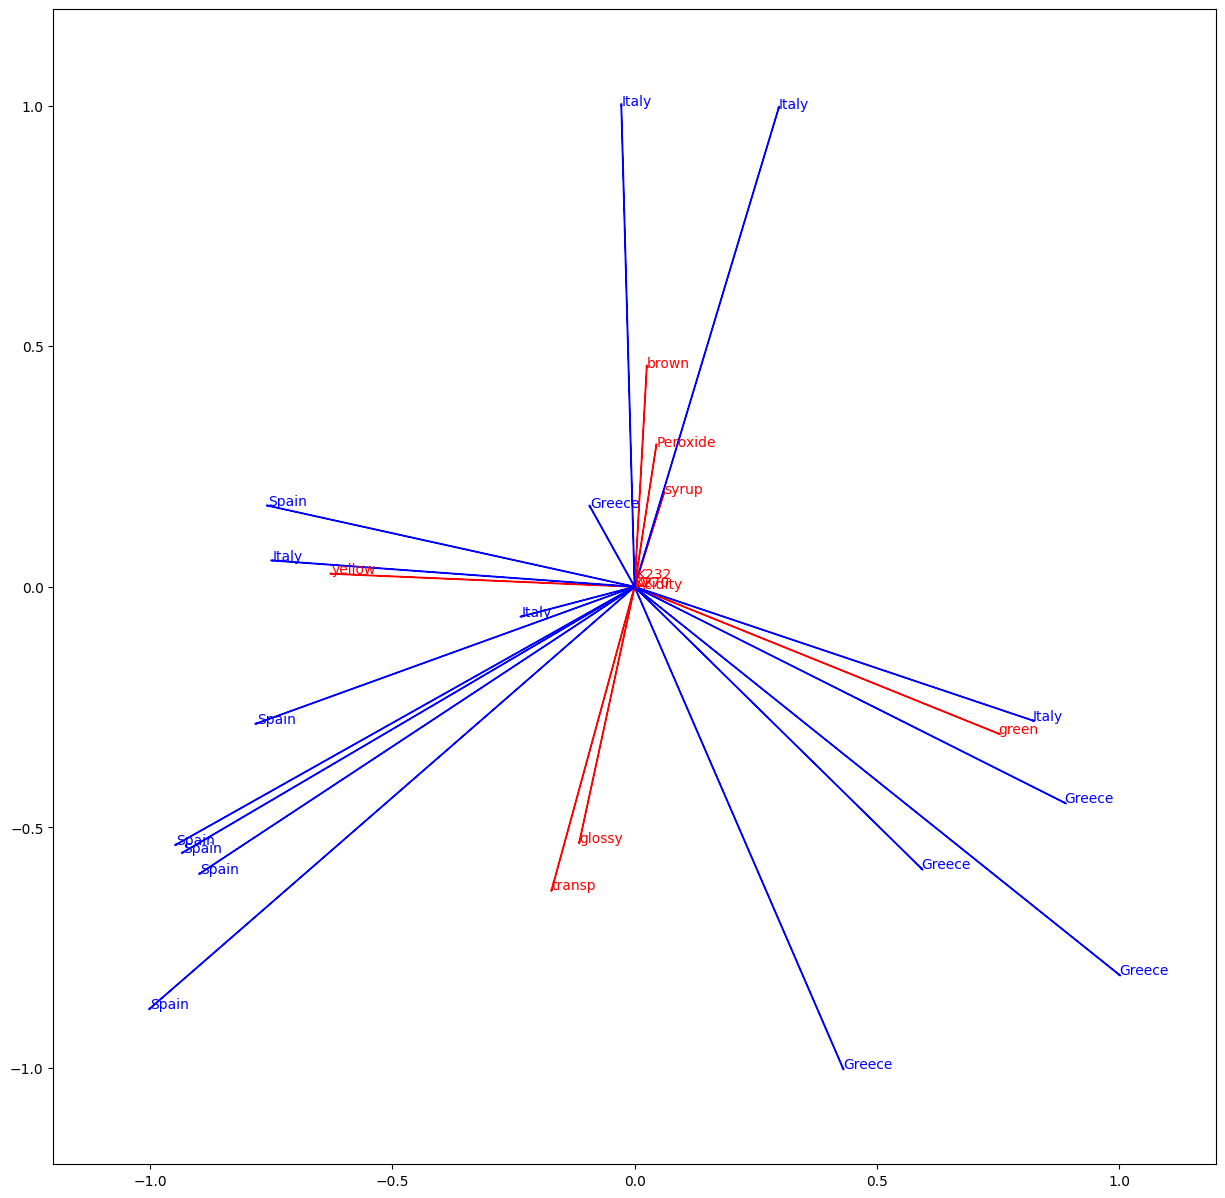

In [ ]:
# hand made biplot alternative in Python

# extract scores (one score per individual per component)
scores_df = pd.DataFrame(my_plsr.x_scores_)

# standardize scores between -1 and 1 so they fit on the plot
std_scores_dim1 = 2 * ( (scores_df[0] - min(scores_df[0])) / (max(scores_df[0]) - min(scores_df[0])) ) -1
std_scores_dim2 = 2 * ( (scores_df[1] - min(scores_df[1])) / (max(scores_df[1]) - min(scores_df[1])) ) -1

#extract loadings (one loading per variable per component)
loadings_df = pd.DataFrame(my_plsr.x_loadings_)

# create the biplot by plotting each data point individualle (one by one)
plt.figure(figsize=(15, 15))
plt.xlim((-1.2,1.2))
plt.ylim((-1.2,1.2))

for i, var_i in enumerate(data.columns[0:11]):
  x = loadings_df.loc[i, 0]
  y = loadings_df.loc[i, 1]

  plt.arrow(0,0,x,y, color= 'red')
  plt.text(x,y,var_i, color= 'red')

for i in range(len(std_scores_dim1)):
  x  = std_scores_dim1[i]
  y = std_scores_dim2[i]

  plt.arrow(0,0,x,y, color= 'blue')
  plt.text(x,y,data.loc[i, 'countries'], color= 'blue')

plt.show()